In [1]:
from keras.models import Sequential 
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [2]:
import keras
from keras.datasets import mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

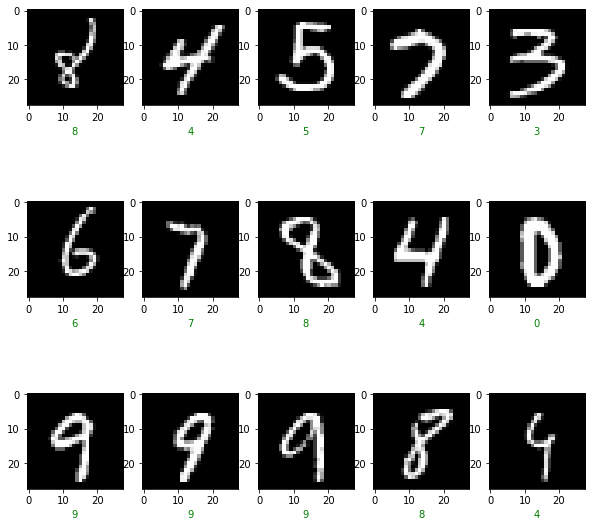

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
fig = plt.figure(figsize=(10, 10)) 
for i in range(1, 16): 
  rn = np.random.randint(60000)
  fig.add_subplot(3, 5, i) 
  plt.imshow(X_train[rn], cmap='gray')
  plt.xlabel(Y_train[rn], color='g') 
plt.show()

In [4]:
img_rows, img_cols = 28, 28

In [5]:
from keras import backend as k 
if k.image_data_format()=='channels_first': 
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols) 
  input_shape = (1, img_rows, img_cols) 
else: 
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) 
  input_shape = (img_rows, img_cols, 1) 

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train/255 
X_test = X_test/255 

In [6]:
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [7]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
print(np.unique(Y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [9]:
num_classes = 10 
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [10]:
def build_model(): 
  model = Sequential() 

  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) 

  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(32, kernel_size=(3,3), activation='relu')) 

  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Dropout(0.25)) 

  model.add(Flatten())

  model.add(Dense(256, activation='relu')) 

  model.add(Dropout(0.5)) 

  model.add(Dense(num_classes, activation='softmax')) 

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy']) 

  model.summary() 

  return model 

In [11]:
num_epoch = 10 
batch_size = 64 

model = build_model() 
model_log = model.fit(X_train, Y_train, batch_size=64, epochs=num_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Loss:', score[0]) 
print('Test Accuracy:', score[1])

Test Loss: 0.02177574299275875
Test Accuracy: 0.993399977684021


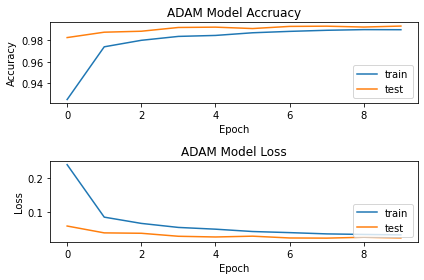

In [13]:
fig = plt.figure() 

plt.subplot(2, 1, 1) 
plt.plot(model_log.history['accuracy']) 
plt.plot(model_log.history['val_accuracy']) 
plt.title('ADAM Model Accruacy') 
plt.xlabel("Epoch") 
plt.ylabel("Accuracy") 
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2, 1, 2) 
plt.plot(model_log.history['loss']) 
plt.plot(model_log.history['val_loss']) 
plt.title('ADAM Model Loss') 
plt.xlabel("Epoch") 
plt.ylabel("Loss") 
plt.legend(['train', 'test'], loc='lower right')

plt.tight_layout() 

In [14]:
def build_model(): 
  model = Sequential() 

  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) 

  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(32, kernel_size=(3,3), activation='relu')) 

  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Dropout(0.25)) 

  model.add(Flatten())

  model.add(Dense(256, activation='relu')) 

  model.add(Dropout(0.5)) 

  model.add(Dense(num_classes, activation='softmax')) 

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adagrad', metrics=['accuracy']) 

  model.summary() 

  return model 

In [15]:
num_epoch = 10 
batch_size = 64 

model = build_model() 
model_log = model.fit(X_train, Y_train, batch_size=64, epochs=num_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 800)              

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Adagrad Test Loss:', score[0]) 
print('Adagrad Test Accuracy:', score[1])

Adagrad Test Loss: 0.21618635952472687
Adagrad Test Accuracy: 0.9387999773025513


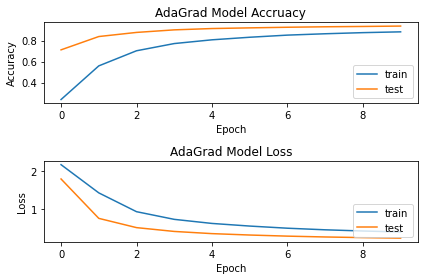

In [17]:
fig = plt.figure() 

plt.subplot(2, 1, 1) 
plt.plot(model_log.history['accuracy']) 
plt.plot(model_log.history['val_accuracy']) 
plt.title('AdaGrad Model Accruacy') 
plt.xlabel("Epoch") 
plt.ylabel("Accuracy") 
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2, 1, 2) 
plt.plot(model_log.history['loss']) 
plt.plot(model_log.history['val_loss']) 
plt.title('AdaGrad Model Loss') 
plt.xlabel("Epoch") 
plt.ylabel("Loss") 
plt.legend(['train', 'test'], loc='lower right')

plt.tight_layout() 